<a href="https://colab.research.google.com/github/raudh1/ShellModels/blob/main/shell_model_prove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.offsetbox import AnchoredText
from scipy.integrate import solve_ivp

from scipy.integrate import complex_ode
from matplotlib import pyplot

In [2]:
N=20
knn=np.power(2,np.arange(N+4))
kn=knn*np.power(2,-4.)


In [3]:
def shellmodel(t, u):
      nu=2e-6
      an=np.ones(N+4)
      bn=-0.5*np.ones(N+4)
      cn=-0.5*np.ones(N+4)
      fn=np.zeros(N+4,dtype=complex)
      #cn=np.zeros(N+4)
      #cn=(1.-bn)


      an[N+3]=0.
      an[N+2]=0.

      bn[0]=0.
      bn[N+3]=0.

      cn[0]=0.
      cn[1]=0.

      fn[3]=(1.+1.j)*8.e-1
      res=np.zeros((N+4),dtype=complex)
      #a,b,c=-1.,0.5,0.5
      #print((2,N+2),res.shape[0])

      eta=np.power(nu**3/(np.abs(fn[3])),1/4.)
      #print(1/eta)

      for i in range(2, N+2):
          #SABRA U
          #print(i)                                                                        cambiato da i-3
          #                                                                                       |
          #                                                                                       v
          res[i]=1j*(an[i]*kn[i+1]*u[i+2]*np.conjugate(u[i+1])+bn[i]*kn[i]*u[i+1]*np.conjugate(u[i-1])-cn[i]*kn[i-1]*u[i-1]*u[i-2])+fn[i]-nu*kn[i]**2*u[i] 
      return  res


In [4]:
nu=2e-6
fn=(1.+1j)*8.e-1
eta=np.power(nu**3/(np.abs(fn)),1/4.)
print(1/eta)

19392.27447486858


In [5]:
taueta=np.power(nu/np.real(fn).real,0.5)
print(taueta)

0.0015811388300841897


In [13]:
Un=1e-3*kn**(-1)*(1.+1.j)*np.ones(N+4,dtype=complex)

#u0=1j*np.ones((2*(N+4)))
u0=np.array(Un)
#u0=u0.reshape(1,2*(N+4))
#u20=2*np.ones(N)

t=0
r = complex_ode(shellmodel).set_integrator('vode', method='bdf',order='2')
r.set_initial_value(Un,0)
t1 = 6.1
dt = 1e-4
#print(r.successful(),r.t,t1)
i=0
a=[]
while r.successful() and r.t < t1:
      r.t
      a.append(r.integrate(r.t+dt))
      i=i+1
print(i)
Uf=np.transpose(a)

61001


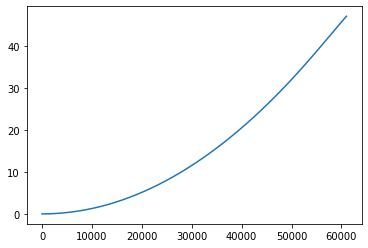

In [14]:
Uf2=Uf[2:-2]
Energy=np.sum((Uf2*np.conj(Uf2)).real,axis=0)
plt.plot(Energy)

#plt.plot(np.sum((Un*np.conj(Un)).real,axis=0))

#plt.ylim(0,1e-3)
plt.show()

In [8]:
#print(Energy)

In [9]:
#print(np.mean((Uf*np.conj(Uf)),1),Uf[2].shape[:])

In [10]:
#print(Uf.shape[:],Un.shape[:])

In [11]:
#plt.plot(kn,(Un*np.conj(Un)).real,'bo')
#plt.loglog()
#plt.show()

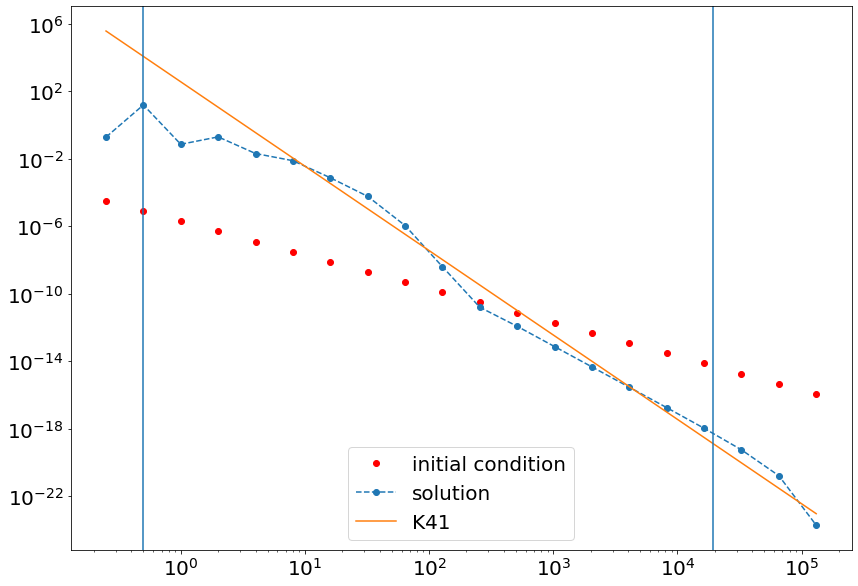

In [16]:
plt.figure(figsize=(14,10))
plt.plot(kn[2:-2],(Un*np.conj(Un)).real[2:-2],'ro',label='initial condition')
plt.plot(kn[2:-2],(np.mean((Uf*np.conj(Uf)),1).real)[2:-2],'o--',label='solution')
plt.plot(kn[2:-2],1e3*np.power(np.abs(fn),2/3.)*kn[2:-2]**-5/3.,label='K41')
plt.axvline(x=1/eta)
plt.axvline(x=kn[3])
#plt.xlabel(r'$k$', fontsize=20)
#plt.ylabel(r'$E(k)$', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#pyplot.annotate(r'$k_{in}$',(kn[3],1e-19),fontsize='20')
#pyplot.annotate(r'$k_{out}$',(1/eta,1e-19),fontsize='20')
plt.loglog()
plt.savefig('./K41_shell_model_N=20')
plt.show()
#np.save('./sol_0.02.npy',(np.mean((Uf*np.conj(Uf)),1).real)[2:-2])

In [31]:
scale=1/(nu*kn)
print(scale)

[1.60000000e+07 8.00000000e+06 4.00000000e+06 2.00000000e+06
 1.00000000e+06 5.00000000e+05 2.50000000e+05 1.25000000e+05
 6.25000000e+04 3.12500000e+04 1.56250000e+04 7.81250000e+03
 3.90625000e+03 1.95312500e+03 9.76562500e+02 4.88281250e+02
 2.44140625e+02 1.22070312e+02 6.10351562e+01 3.05175781e+01
 1.52587891e+01 7.62939453e+00 3.81469727e+00 1.90734863e+00]


**structure functions in all their beauty**

In [124]:
plt.figure(figsize=(14,10))
Uf=np.abs(Uf)
S1=np.mean(((Uf)[2:-2]),1)
S3=np.mean((Uf)[2:-2]**2,1)
S3=np.mean((Uf)[2:-2]**3,1)
S4=np.mean((Uf)[2:-2]**4,1)
S5=np.mean((Uf)[2:-2]**5,1)
S6=np.mean((Uf)[2:-2]**6,1)
S7=np.mean((Uf)[2:-2]**7,1)
S8=np.mean((Uf)[2:-2]**8,1)
S9=np.mean((Uf)[2:-2]**9,1)
print(len(S2),len(S4)) 

18 18


<Figure size 1008x720 with 0 Axes>

In [106]:
print((S2.shape[:]))

(18,)


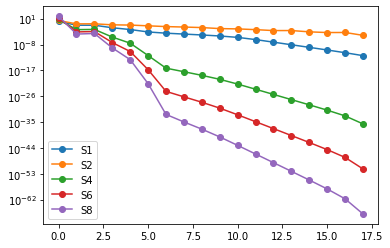

In [125]:
plt.plot(S1,'o-',label='S1')
plt.plot(S2,'o-',label='S2')
#plt.plot(S3,'o-',label='S3')
plt.plot(S4,'o-',label='S4')
#plt.plot(S5,'o-',label='S5')
plt.plot(S6,'o-',label='S6')
#plt.plot(S7,'o-',label='S7')
plt.plot(S8,'o-',label='S8')
#plt.plot(S9,'o-',label='S9')
plt.yscale("log")
#plt.loglog()
plt.legend()
plt.show()

In [127]:
(S2)

array([2.25744837e+00, 1.50656983e-01, 1.58279440e-01, 6.97152808e-02,
       5.77204003e-02, 3.16011330e-02, 1.71748613e-02, 1.18775190e-02,
       7.77155291e-03, 3.41948890e-03, 2.69073588e-03, 1.48262311e-03,
       7.01680467e-04, 7.19746318e-04, 2.54718281e-04, 1.44658670e-04,
       1.53126680e-04, 1.54143947e-05])

In [ ]:
--- prove ---